In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
col = ["duration","protocoltype","service","flag","srcbytes","dstbytes","land",
       "wrongfragment","urgent","hot","numfailedlogins","loggedin","numcompromised",
       "rootshell","suattempted","numroot","numfilecreations","numshells",
       "numaccessfiles","numoutboundcmds","ishostlogin","isguestlogin","count",
       "srvcount","serrorrate","srvserrorrate","rerrorrate","srvrerrorrate",
       "samesrvrate","diffsrvrate","srvdiffhostrate","dsthostcount","dsthostsrvcount",
       "dsthostsamesrvrate","dsthostdiffsrvrate","dsthostsamesrcportrate",
       "dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
       "dsthostrerrorrate","dsthostsrvrerrorrate","attack","lastflag"]

df = pd.read_csv('Train.txt', sep=',', names=col)

In [3]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [4]:
df.drop(['land', 'urgent', 'numfailedlogins', 'numoutboundcmds'], axis=1, inplace=True)

In [5]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [6]:
print(df.isna().sum())

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
wrongfragment             0
hot                       0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
ishostlogin               0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate      0
dsthostrerrorrate   

In [7]:
le = LabelEncoder()
df['protocoltype'] = le.fit_transform(df['protocoltype'])
df['service'] = le.fit_transform(df['service'])
df['flag'] = le.fit_transform(df['flag'])
df['attack'] = le.fit_transform(df['attack'])

In [8]:
inertia = []
K = range(1, 39)
for k in K:
    kmean = KMeans(n_clusters=k, random_state=111)
    kmean.fit(df)
    inertia.append(kmean.inertia_)

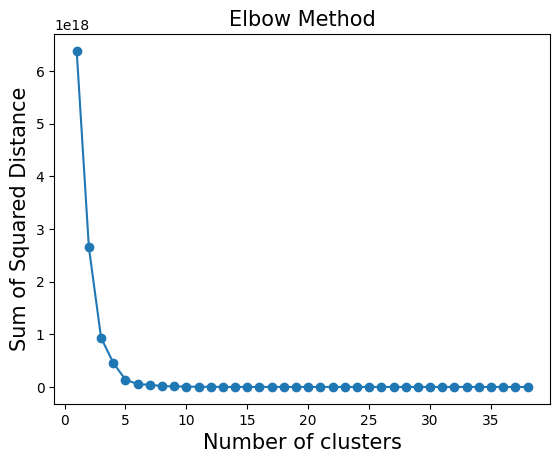

In [9]:
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method', fontsize=15)
plt.xlabel('Number of clusters', fontsize=15)
plt.ylabel('Sum of Squared Distance', fontsize=15)
plt.show()

In [10]:
kmeans = KMeans(n_clusters=5, random_state=111)
kmeans.fit(df)

KMeans(n_clusters=5, random_state=111)

In [11]:
df['cluster_label'] = kmeans.labels_

In [12]:
silhouette_score = metrics.silhouette_score(df, kmeans.labels_)
print(f'Silhouette Score: {silhouette_score}')

Silhouette Score: 0.999903067649602


In [13]:
centroids = kmeans.cluster_centers_
centroid_diff = np.diff(centroids, axis=0)
feature_importance = np.abs(centroid_diff)
avg_importance = np.mean(feature_importance, axis=0)
sorted_indices = np.argsort(avg_importance)[::-1]
column_names = df.columns


In [14]:
sorted_column_names = column_names[sorted_indices]

In [15]:
sorted_importance_scores = avg_importance[sorted_indices]

In [16]:
for col_name, importance_score in zip(sorted_column_names, sorted_importance_scores):
    print(f"Feature: {col_name}, Importance: {importance_score}")

Feature: srcbytes, Importance: 919643442.5868634
Feature: dstbytes, Importance: 755042221.8903862
Feature: duration, Importance: 22066.301451792162
Feature: dsthostcount, Importance: 129.70415723944484
Feature: count, Importance: 29.98642843911667
Feature: dsthostsrvcount, Importance: 29.040063708172884
Feature: service, Importance: 11.776811680493266
Feature: srvcount, Importance: 6.893223977559921
Feature: lastflag, Importance: 3.5428128183754737
Feature: flag, Importance: 1.9117248177403774
Feature: attack, Importance: 1.0936986464494103
Feature: dsthostrerrorrate, Importance: 0.7130365842363618
Feature: dsthostsamesrcportrate, Importance: 0.6920901440876434
Feature: dsthostsrvrerrorrate, Importance: 0.4149516730837932
Feature: dsthostdiffsrvrate, Importance: 0.3809318990724937
Feature: rerrorrate, Importance: 0.35168945077336294
Feature: srvrerrorrate, Importance: 0.3313834729223725
Feature: samesrvrate, Importance: 0.243104916709668
Feature: hot, Importance: 0.21777014779237597
Fe

In [17]:
cluster_profiles = df.groupby('cluster_label').mean()
print(cluster_profiles)


                   duration  protocoltype    service      flag      srcbytes  \
cluster_label                                                                  
0                285.294193      1.053205  31.226087  6.980233  1.187665e+04   
1              35324.500000      1.000000  34.000000  3.000000  1.273742e+09   
2              10999.000000      1.000000  44.000000  4.000000  0.000000e+00   
3              24647.666667      1.000000  29.333333  2.666667  5.655511e+08   
4              39899.500000      1.000000  49.000000  4.000000  0.000000e+00   

                   dstbytes  wrongfragment       hot  loggedin  \
cluster_label                                                    
0              3.025562e+03       0.022689  0.204414  0.395761   
1              0.000000e+00       0.000000  0.000000  0.000000   
2              1.309937e+09       0.000000  0.000000  0.000000   
3              0.000000e+00       0.000000  0.333333  0.000000   
4              4.002911e+08       0.000000 

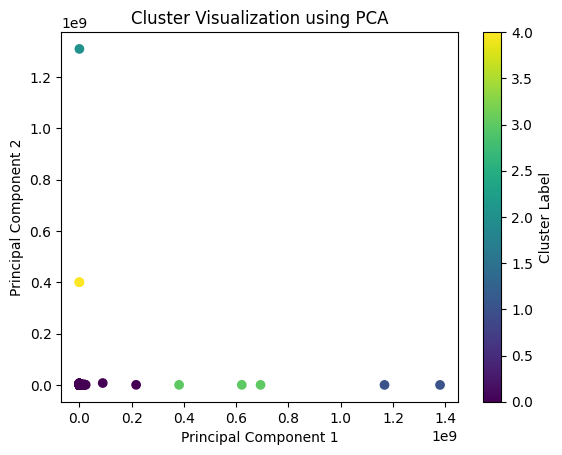

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop('cluster_label', axis=1))

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['cluster_label'], cmap='viridis')
plt.colorbar(label='Cluster Label')
plt.title('Cluster Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [19]:
from joblib import dump


dump(kmeans, 'kmeans_model.joblib')


['kmeans_model.joblib']